## Utfordring 1.1

### 1.1 Gjennomsnittlig arbeidsfordeling mellom menn og kvinner

Nedenfor vil jeg illustrere grafisk antall arbeidstimer menn og kvinner i Norge jobber gjennomsnittlig. Ved bruk av data fra 1996-2022 vil dere få sett hvor stor forskjellene er og hvordan det har forandret seg over årene. Senere skal jeg gå inn på hva vi ser og hvorfor vi ser de endringene som har vært.

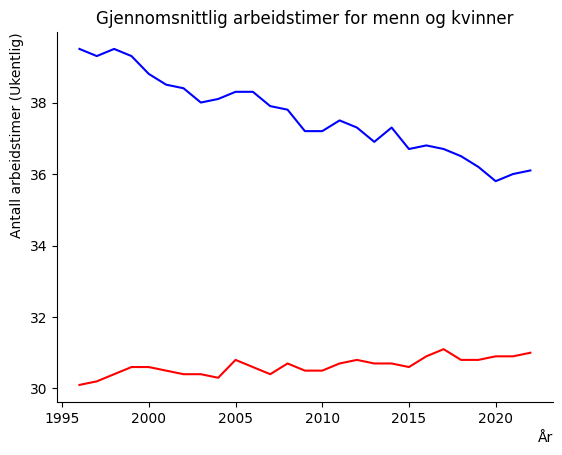

In [229]:
from matplotlib import pyplot as plt
import pandas as pd
import json
import requests
from pyjstat import pyjstat
import datetime
import seaborn as sns
import numpy as np
import sympy as sp
from IPython.display import Image, display
from PIL import Image

#Henter URL
postUrl = "https://data.ssb.no/api/v0/no/table/04544/"

#Query
apiQuery = {
  "query": [
    {
      "code": "Kjonn",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Yrkesstatus",
      "selection": {
        "filter": "item",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FaktiskArbeidstid"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

#Gjør query om til et datasett
def apiToDataframe(postUrl, query): 
  res = requests.post(postUrl, json=query)
  ds = pyjstat.Dataset.read(res.text)
  df = ds.write('dataframe')
  df_id = ds.write('dataframe', naming='id')
  return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

df_gjennomsnitt = df
df_gjennomsnitt['år'] = pd.to_numeric(df_gjennomsnitt['år'])

df_kvinner = df_gjennomsnitt[df_gjennomsnitt['kjønn']=="Kvinner"]
df_menn = df_gjennomsnitt[df_gjennomsnitt['kjønn']=="Menn"]

#Lager graf
def create_ax():
  fig, ax = plt.subplots()
  ax.set_ylabel('Antall arbeidstimer (Ukentlig)', loc='top')
  ax.set_xlabel('År', loc='right')
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

  return fig, ax

#Plotter graf
fig, ax = create_ax()
plt.xticks()
plt.ticklabel_format(style = 'plain')
plt.title('Gjennomsnittlig arbeidstimer for menn og kvinner', color='black')
ax.plot(df_kvinner["år"], df_kvinner["value"], label= "Kvinners", color="red")
ax.plot(df_menn["år"], df_menn["value"], label= "Menn", color="blue")
plt.show()


Her ser vi hvordan utviklingen for antall arbeidstimer for menn og kvinner har forandret seg gjennom årene, rød graf viser antall timer kvinner jobber og blå er for menn. Det første vi legger merke til er at menn jobber mindre og kvinner jobber mer, men hvorfor? Det finnes flere årsaker til hvorfor, men en av de er at større fleksibilitet i arbeidslivet gjør at arbeidstakere har bedre muligheter til å delta på markedet. Kvinner velger mer nå å ta utdanning og jobbe istedenfor å være hjemme med barn ved hjelp av subsidert barnepass. Barnepass i form av barnehagestøtte, familiehjelp og foreldrepermisjon bidrar til et tryggere arbeidsmarket slik at flere kan ta seg jobb uten at man risikerer å miste den. En annen årsak til en slik utvikling, spesielt hos kvinner er at man fødselstallene har synket betraktelig over tid. Det gir mer frihet til å velge karriere over å være hjemme og ta hånd om barn.

### 1.1 Sammenhengen på betalt foreldrepermisjon og yrkesdeltakelse blant kvinner

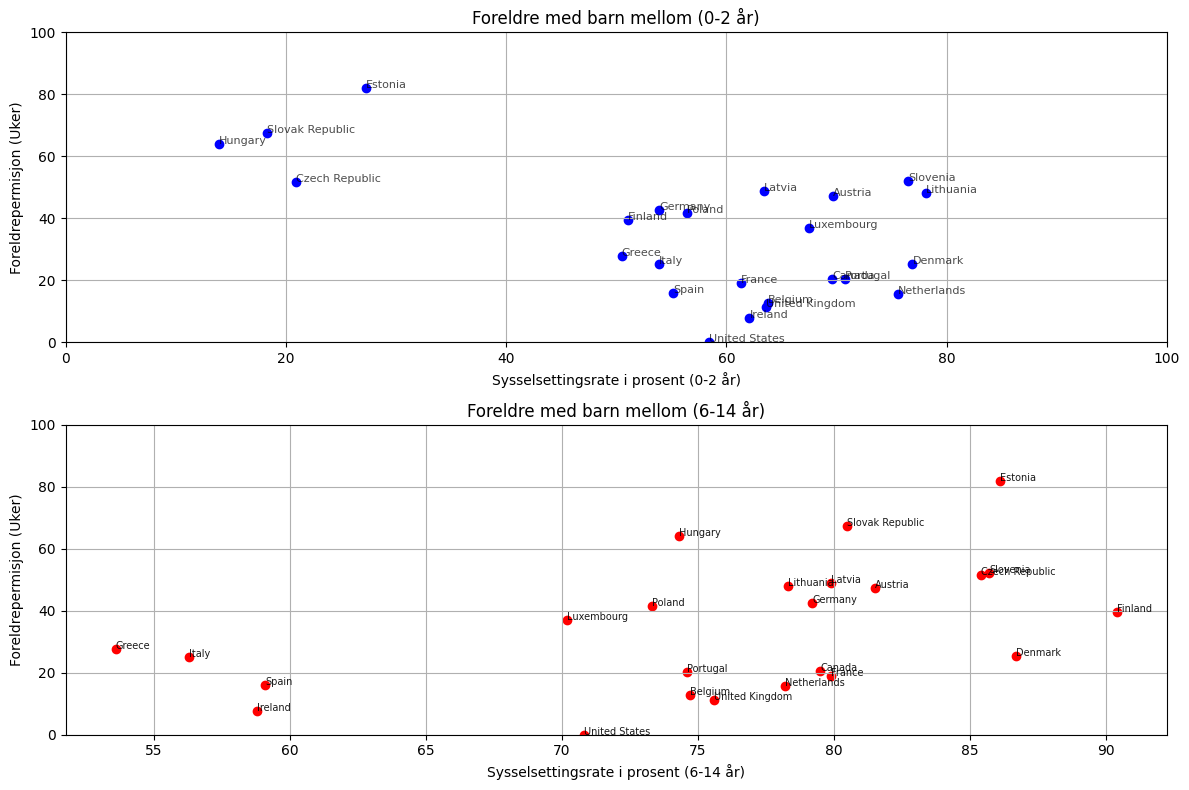

In [135]:
url = "https://raw.githubusercontent.com/uit-sok-2008-h23/uit-sok-2008-h23.github.io/main/assets/women.csv"

df_permisjon = pd.read_csv(url, sep=";")

df_permisjon2 = df_permisjon.reset_index(drop=True)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.scatter(df_permisjon2['fem_emp_rate_0_2'], df_permisjon2['tot_full_rate'], color='b')
plt.xlabel('Sysselsettingsrate i prosent (0-2 år)')
plt.ylabel('Foreldrepermisjon (Uker)')
plt.title('Foreldre med barn mellom (0-2 år)')
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.grid()

for i, row in df_permisjon2.iterrows():
    plt.annotate(row['country'], (row['fem_emp_rate_0_2'], row['tot_full_rate']), fontsize=8, alpha=0.7)


plt.subplot(2, 1, 2)
plt.scatter(df_permisjon2['fem_emp_rate_6_14'], df_permisjon2['tot_full_rate'], color='r')
plt.xlabel('Sysselsettingsrate i prosent (6-14 år)')
plt.ylabel('Foreldrepermisjon (Uker)')
plt.title('Foreldre med barn mellom (6-14 år)')
plt.ylim(0, 100)
plt.grid()

for i, row in df_permisjon2.iterrows():
    plt.annotate(row['country'], (row['fem_emp_rate_6_14'], row['tot_full_rate']), fontsize=7, alpha=0.9)

plt.tight_layout()
plt.show()



I det øverste diagrammet ser vi antall uker permisjon kvinner har for barn i alderen 0-2 år og i den nederste ser vi sysselsettingsraten for kvinner med barn mellom 6-14 år. Vi ser en mulig korrelasjon mellom de landene som har en god og land permisjonsordning for hvor stor del av befolkningen som er i arbeid når ungene blir eldre. 

Estonia er et godt eksempel på hvorfor en slik ordning kan fungere, de har som sett i den første grafen en permisjonsordning på over 80 uker. Når barna blir eldre ser vi at sysselsettingsraten stiger fra rundt tretti prosent og opp til nesten nitti prosent. Andre land slik som Hungary, Slovak Republic og Czech Republic viser til en lik trend, med lang betalt permisjonordninger når barn er ung og en høy sysselsettingsrate når barna blir eldre. Generelt viser det til en positiv relasjon for de landene med en god permisjonsordning for hvordan sysselsettingsraten blir å utvikle seg.

### 1.1 Hvorfor er høy yrkesdeltakelse blant kvinner og høye barnetall viktig for velferdsmodellen?

Høy yrkesdeltakelse spiller en særdeles viktig rolle for at den norske velferdsmodellen skal kunne være bærekraftig og fungere slik som den gjør i dag. Tidligere var normalen at kvinner holdt seg hjemme og tok hånd om husarbeid og barn mens mennene var ute å jobbet, det har siden den gang endret seg og kvinner tar større og større del i arbeidslivet, det har velferdsmodellen hatt god nytte av. 

Finansieringen av velferdsmodellen er i all hovedsak bygget opp av skatter, der alle bidrar til en kollektiv finansiering slik at man kan ta nytte av helse- og omsorgstjenester, gratis utdanning og gode pensjonsordninger. Velferdsmodellen bidrar til en jevn inntektsfordeling slik at de som er mest utsatt og som ellers har blitt tatt ut av arbeidsmarkedet skal kunne få en levestandard som er akseptabel og som gjør at alle og en hver skal kunne ha det bra. 

Generasjonskontrakten - Ved at alle som kan deltar på arbeidsmarkedet vil man få en bærekraftig velferdsmodell som gjør at de eldre blir sikret en god pensjonsordning, det er spesielt viktig når levetiden økes og lengden på utbetalt pensjon blir lengre. Høy yrkesdeltakelse blant kvinner har bidratt til en stor økonomisk vekst i velferdsstaten ved at det blir bidratt til at de samlede skatteinntektene vil være høyere, på den måten skaper man en velferdsmodell som vil vare i lang tid framover.

Med en stadig lengre levealder er det blitt en vesentlig større bekymring for at barnetallene i Norge synker, lengre pensjoner blant de eldre krever at flere bidrar i arbeidsmarkedet slik at velferdsordningen kan fortsette å være bærekraftig. Antallet fødsler påvirker direkte skattebyrden vår for fremtiden, og familiepolitikken jobber for å forsørge at antall fødsler på lang sikt skal øke ved å minke kostnadene for familier å ha barn.

## Utfordring 1.2

### 1.2 Sammenhengen mellom egenbetalinger og forbruk av helsetjenester

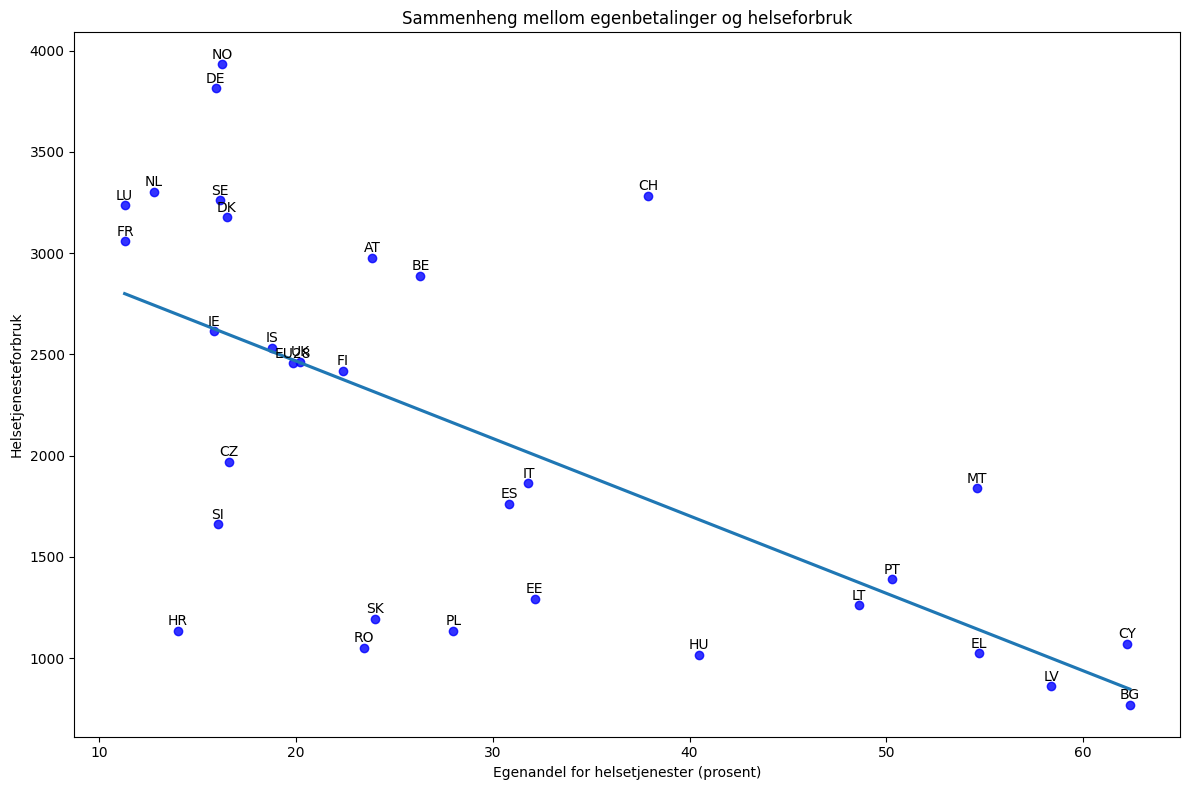

In [228]:
url = "https://raw.githubusercontent.com/Markusbentsen/Nordiske-Modellen/main/Utfordring%201/estat_hlth_sha11_hf_filtered_en-3.csv"

df_helse = pd.read_csv(url)

df_wide = df_helse.pivot(index="geo", columns="icha11_hf", values="OBS_VALUE")

df_wide = df_wide.reset_index()

df_wide["percentage"] = df_wide["HF3"]/df_wide["HF1"] * 100

plt.figure(figsize=(12, 8))

sns.regplot(x='percentage', y='HF1', data=df_wide, scatter_kws={'color': 'b'}, ci=None)

for i, country_name in enumerate(df_wide['geo']):
    plt.annotate(country_name, (df_wide['percentage'][i], df_wide['HF1'][i]), textcoords="offset points", xytext=(0, 4), ha='center')

plt.xlabel('Egenandel for helsetjenester (prosent)')
plt.ylabel('Helsetjenesteforbruk')
plt.title('Sammenheng mellom egenbetalinger og helseforbruk')

plt.tight_layout()
plt.show()








Grafen ovenfor viser sammenhengen mellom egenandelen for helsetjenester og forbruket av helsetjenester i de ulike landene. Langs X aksen ser man prosentvis hvor mye hver enkelte må betale fra egen lomme for å få helsetjenester, mens langs Y aksen ser vi forbruket av helsetjenester hvert land har. Tall brukt i grafen er fra 2019. 

Det kan tyde på en korrelasjon på hvor mye egenandelen man må betale og hvor mye helsetjenester man velger å ta i bruk, med noen få unntak. Land med lav egenandel tar langt oftere i bruk helsetjenester enn de med stor egenandel. Land som Kypros og Bulgaria har et veldig lavt forbruk som en følge av ekstremt store kostnader hver enkelte person må bruke. 

Folk flest virker å være mer villig til å ta i bruk ulike helsetjenester ettersom egenandelen de må betale er lav, mens land med en høy egenandelsrate velger heller og kun å få hjelp når det er høyst nødvendig.

### 1.2 Hvordan påvirker økt egenbetaling helsetjenesteforbruket, og hva er fordelingseffekten av økte egenandeler?


Nedenfor ser man en figur som viser hvordan helsetjenester fungerer. $P_0$ vise hvor mye det koster for samfunnet for helsetjenestene som blir brukt. $0.15P_0$ er egenandelen man per dags dato betaler for helsetjenester, dersom man hadde hatt helseforsikring ville forbruket steget fra $M_0$ til $M_2$. $M_1$ er hvor mye helsetjenester dersom det ikke hadde vært egenandeler.

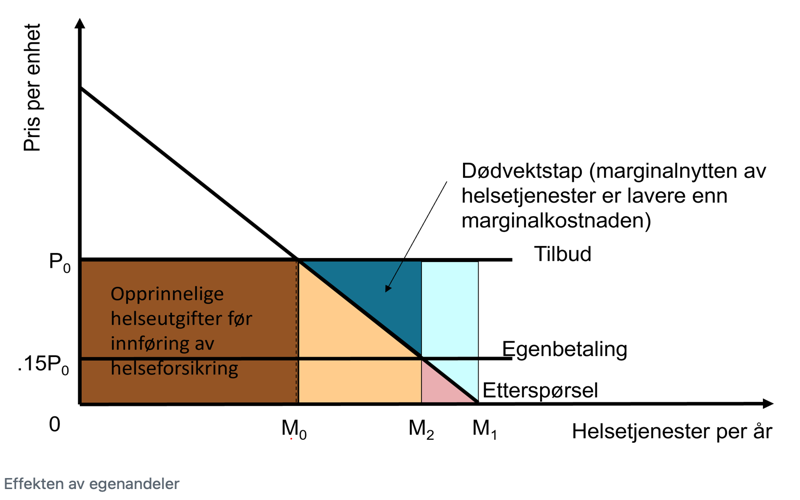

In [232]:
image_path3 = 'egenandel.png.png'
new_size = (800, 500) 
image3 = Image.open(image_path3)
resized_image3 = image3.resize(new_size)


display(resized_image3)

Økte egenbetalinger påvirker hvordan folk tenker og valg man tar, det samme gjelder for helsetjenester. Sett i et tilfelle der konsumenten må betale egenandel for tilbud av helsetjenester vil konsumenten etterspørre helsetjenester inntil betalingsvilligheten er lik prisen de selv må betale. 

Det mest samfunnsøkonomiske ville vært dersom man ikke hadde helseforsikring og betale alt fra egen lomme, da ville dødvektstapet blitt minimert og man hadde oppnådd en større effektivitet i forhold til hvordan ressurser ble brukt. En slik ordning ville derimot aldri fungert i en velferdsstat da det hadde gått ut over de mest utsatte som ikke ville eller kunne tatt seg råd til 
En økning i egenandelen for helsetjenester kan påvirke forbruket avhengig av hvor prisfølsomt etterspørselen er. Dersom etterspørselen er elastisk er det mest optimalt med egenandeler, og det er dermed best med høye egenandeler og lave forsikringsdekninger av tjenester. Egenandeler har flere insentiveffekter, men kan også bidra til uheldige konsekvenser for de med lav inntekt. De som har størst behov for helsetjenester vil bli sterkest påvirket av en økning i egenandel da de er dem med lavest betalingsvillighet og vil da kun ta i bruk tjenestene når det er høyst nødvendig. De med høy betalingsvillighet blir ikke like påvirket av en slik løsning da forbruket deres ofte ikke blir satt på like stor prøve. 



## Appendix

I oppgaven har jeg tatt i bruk KI, her er linker til spørsmål jeg har stilt.

ChatGPT. https://chat.openai.com/c/92a25cba-6f69-48b8-9ebb-fc144d92d7d9

ChatGPT. https://chat.openai.com/c/50bc0875-1d46-4e2d-8b45-3db712a68d91 

ChatGPT. https://chat.openai.com/c/7be2c5e1-ea11-4762-b434-60d362181721 